In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder


import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew


In [2]:
df = pd.read_csv("datos/bikes_stand.csv", index_col=0)
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,2018-01-01,winter,0,1,1,Monday,0,2,-0.486274,0.855582,-0.208909,654
1,2018-01-02,winter,0,1,0,Tuesday,1,2,-0.425690,0.332722,0.687550,670
2,2018-01-03,winter,0,1,0,Wednesday,1,1,-0.949970,-0.900337,0.685210,1229
3,2018-01-04,winter,0,1,0,Thursday,1,1,-0.938563,-0.170632,-0.210435,1454
4,2018-01-05,winter,0,1,0,Friday,1,1,-0.853992,-0.901843,0.060294,1518


In [3]:
lista_categoricas = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

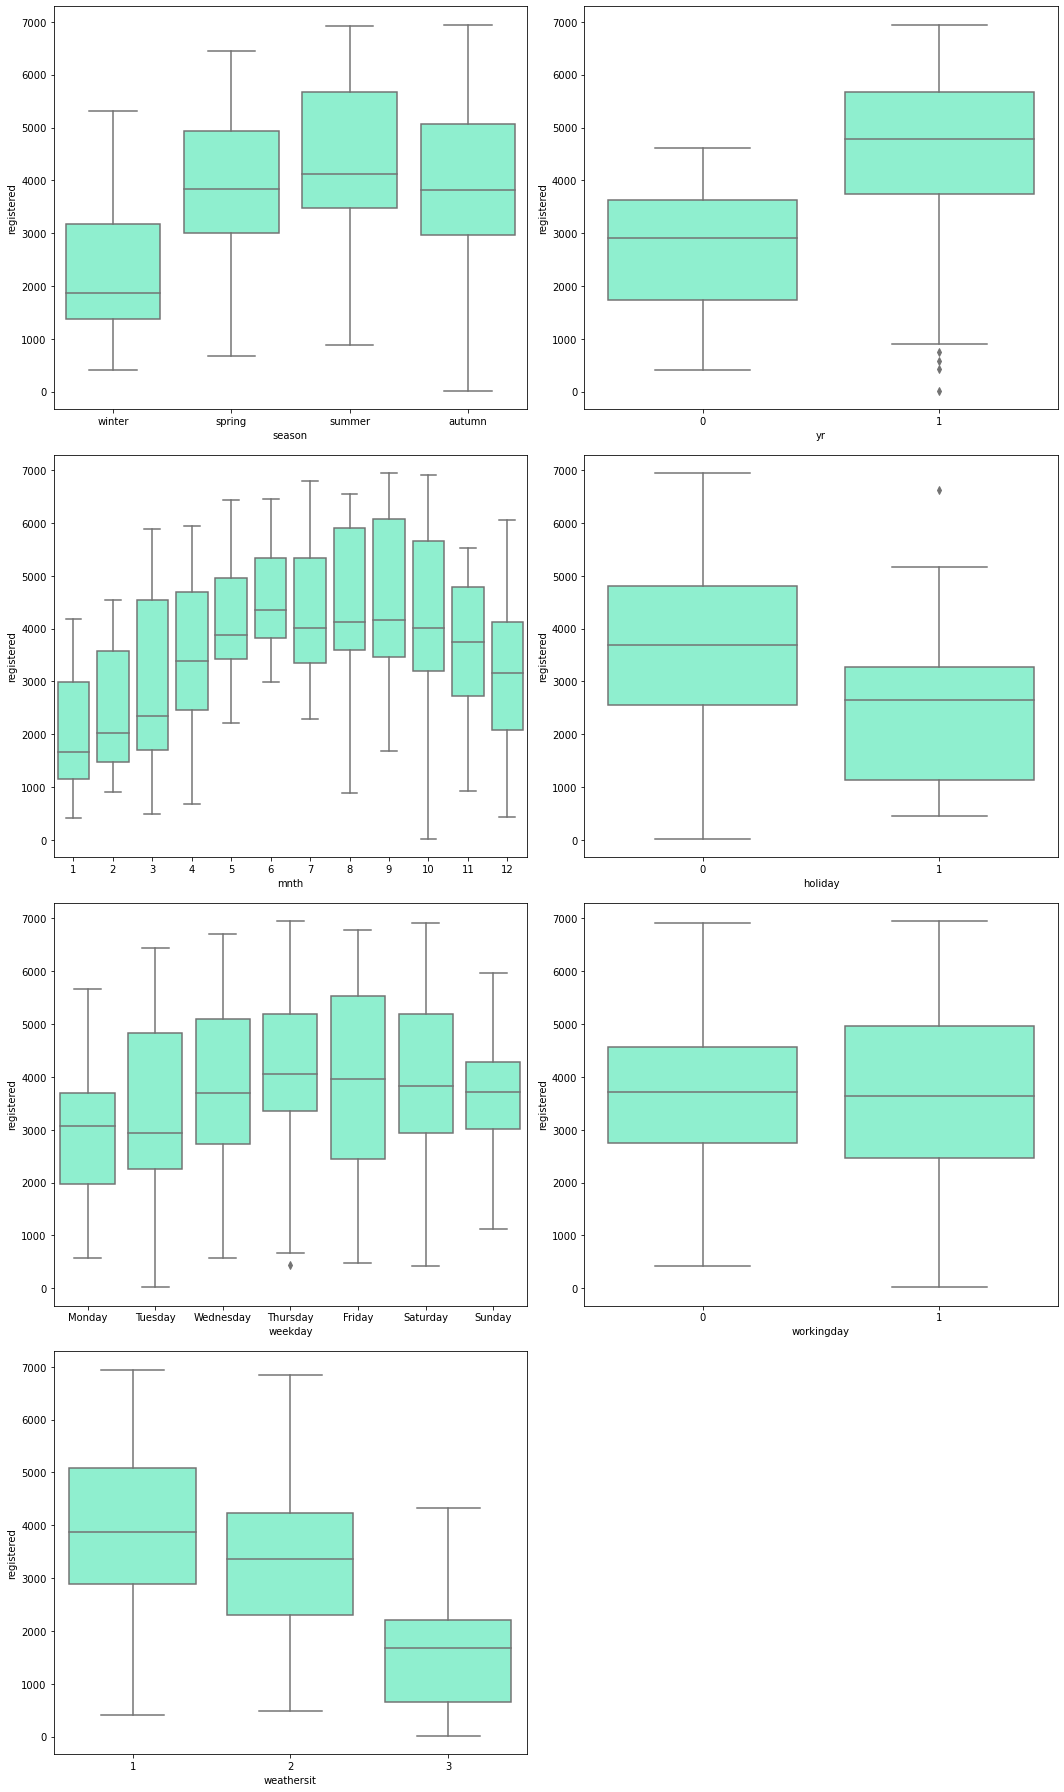

In [4]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(lista_categoricas):
    sns.boxplot(x = columna, y = 'registered' , data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

# Empezamos el encoding

In [5]:
df.groupby("season")["registered"].median()

season
autumn    3815.0
spring    3844.0
summer    4110.5
winter    1869.0
Name: registered, dtype: float64

- ponemos el siguiente encoding:
 - winter:1
 - autumn: 2
 - spring:2
  - summer:2
 

In [6]:
df["season_encoding"] = df["season"].map({"winter": 1, "autumn": 2, "spring": 2, "summer": 2})

In [7]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,season_encoding
0,2018-01-01,winter,0,1,1,Monday,0,2,-0.486274,0.855582,-0.208909,654,1
1,2018-01-02,winter,0,1,0,Tuesday,1,2,-0.425690,0.332722,0.687550,670,1


Procedemos con el encoding de la columna mnth

In [8]:
df.groupby("mnth")["registered"].median()

mnth
1     1657.5
2     2024.0
3     2347.0
4     3395.5
5     3883.5
6     4359.0
7     4005.5
8     4116.5
9     4162.0
10    4014.0
11    3746.5
12    3155.0
Name: registered, dtype: float64

# LAS VARIABLES SIN ORDEN DEBEN SER TRATADAS CON GET DUMMIES (WORKING DAY), HAY QUE MODIFICAR EL ENCODING DE LOS MESES

In [9]:
df['mnth_encoding'] = df['mnth'].map({1:1, 2:1, 3:1, 4:2, 5:3, 6:3, 7:3, 8:3, 9:3, 10:3, 11:3, 12:2 })

In [10]:
df.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,season_encoding,mnth_encoding
0,2018-01-01,winter,0,1,1,Monday,0,2,-0.486274,0.855582,-0.208909,654,1,1


Para hacer el encoding de holiday deberemos invertirla

In [11]:
df['holiday_encoding'] = df['holiday'].map({0:1, 1:0})

In [12]:
df.groupby("weekday")["registered"].median().reset_index().sort_values(by="registered")

,weekday,registered
5,Tuesday,2932.0
1,Monday,3077.0
6,Wednesday,3700.0
3,Sunday,3715.5
2,Saturday,3834.5
0,Friday,3963.5
4,Thursday,4052.5


In [13]:
df['weekday_encoding'] = df['weekday'].map({'Monday':1, 'Tuesday':1, 'Wednesday':2, 'Thursday':2, 'Friday':2, 'Saturday':2, 'Sunday':2})

Procedemos a hacer el encoding de working day - nos parecen iguales, utilizamos one hot encoding.

In [5]:
oh = OneHotEncoder()

In [6]:
df["workingday"].unique()

array([0, 1])

In [7]:
# hacemos la codificación de los datos para la variable dada 
transformados_wd = oh.fit_transform(df[["workingday"]])

In [8]:
# convertimos nuestro array con la codificación hecha en un dataframe, donde tendremos dos columnas, una para los "Yes" y otra para los "No"
oh_df = pd.DataFrame(transformados_wd.toarray())
oh_df.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [9]:
# el método get_feature_names nos va a dar el nombre de las columnas nuevas que se nos generarán
oh_df.columns = oh.get_feature_names_out()
oh_df.columns

Index(['workingday_0', 'workingday_1'], dtype='object')

In [10]:
# concatenamos el dataframe original con el dataframe que acabamos de crear
df = pd.concat([df,oh_df],axis=1)

In [20]:
df.sample(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,season_encoding,mnth_encoding,holiday_encoding,weekday_encoding,workingday_0,workingday_1
314,2018-11-11,autumn,0,11,0,Sunday,0,1,-0.549019,-0.857569,1.360568,2928,2,3,1,2,1.0,0.0
136,2018-05-17,spring,0,5,0,Thursday,1,2,0.196080,1.008439,0.980780,3445,2,3,1,2,0.0,1.0
294,2018-10-22,autumn,0,10,0,Monday,1,1,-0.240523,0.013897,-0.898650,2809,2,3,1,1,0.0,1.0


ENcoding de la columna weathersit

In [21]:
df['weathersit_encoding'] = df['weathersit'].map({1:2, 2:2, 3:1})

# ENCODING ALTERNATIVO

In [11]:
df['mnth_encoding'] = df['mnth'].map({1:1, 2: 1.22, 3:1.42, 4:2.05, 5:2.34, 6:2.63, 7:2.42, 8:2.48, 9:2.51, 10:2.42, 11:2.26, 12:1.9 })
df['holiday_encoding'] = df['holiday'].map({0:1, 1:0})
df['weekday_encoding'] = df['weekday'].map({'Monday':1, 'Tuesday':1, 'Wednesday':2, 'Thursday':2, 'Friday':2, 'Saturday':2, 'Sunday':2})
df["season_encoding"] = df["season"].map({"winter": 1, "autumn": 2, "spring": 2, "summer": 2})
df['weathersit_encoding'] = df['weathersit'].map({1:2.3, 2:2, 3:1})

In [12]:
df.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,registered,workingday_0,workingday_1,mnth_encoding,holiday_encoding,weekday_encoding,season_encoding,weathersit_encoding
0,2018-01-01,winter,0,1,1,Monday,0,2,-0.486274,0.855582,-0.208909,654,1.0,0.0,1.0,0,1,1,2.0
1,2018-01-02,winter,0,1,0,Tuesday,1,2,-0.425690,0.332722,0.687550,670,0.0,1.0,1.0,1,1,1,2.0


In [13]:
df.to_csv("datos/bikes_enco.csv")